# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Exploaring the Data](#3)
- [4. Data Preprocessing](#4)
    - [4.1 Handling Null Values](#4.1)
    - [4.2 Stemming](#4.2)
    - [4.3 Converting the Textual Data to Numerical Data](#4.3)
- [5.  Spliting the data into Training and Testing Data](#5)
- [6. Modeling](#6)
    - [6.1 Logistic Regression](#6.1)
    - [6.2 Random Forest](#6.2)
    - [6.3 KNN](#6.3)
    - [6.4 Bagging](#6.4)
    - [6.5 Gradient Boosting](#6.5)
    - [6.6 Decision Tree](#6.6)
    - [6.7 SVM](#6.7)
    - [6.8 Naive Bayes](#6.8)
- [7. TP, TN, FP, FN](#7)
    - [7.1 Logistic Regression](#7.1)
    - [7.2 Random Forest](#7.2)
    - [7.3 KNN](#7.3)
    - [7.4 Bagging](#7.4)
    - [7.5 Gradient Boosting](#7.5)
    - [7.6 Decision Tree](#7.6)
    - [7.7 SVM](#7.7)
    - [7.8 Naive Bayes](#7.8)


<a id='1'></a>
# Project Description
Build a system to identify unreliable news articles (InClass Prediction Competition)

train.csv: A full training dataset with the following attributes:<br>

id: unique id for a news article<br>
title: the title of a news article<br>
author: author of the news article<br>
text: the text of the article; could be incomplete<br>
label: a label that marks the article as potentially unreliable<br>
1: unreliable<br>
0: reliable<br>
test.csv: A testing training dataset with all the same attributes at train.csv without the label.<br>
submit.csv: A sample submission that you can

Develop a machine learning program to identify when an article might be fake news. Run by the UTK Machine Learning Club.

Submission Format:
For every article in the test dataset, submission files should contain two columns: `id` and `label`. The `id` column should refer to a row in the `test.csv` file, and the `label` column should refer it's class of reliable (`0`), or potentially fake (`1`).

<a id='2'></a>
# Import Necssaries Libraries

In [47]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# Exploaring the data

In [2]:
train_data= pd.read_csv('train.csv')
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [4]:
train_data.shape

(20800, 5)

In [5]:
test_data.shape

(5200, 4)

stropwords are those words which dosen't add much value to a paragraph or text can be the words such as (the, a , you , where, what ,when, etc...)

In [6]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
test_data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

<a id='4'></a>
# Data Preprocessing

<a id='5.1'></a>
## Handling Null Values

In [9]:
train_data.fillna(' ', inplace=True)
test_data.fillna(' ', inplace=True)

test_data['content']=test_data['author']+' '+test_data['title']
train_data['content']=train_data['author']+' '+train_data['title']

In [10]:
train_data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,Howard Portnoy Iranian woman jailed for fictio...


In [11]:
test_data.head()

,id,title,author,text,content
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...


<a id='4.2'></a>
## Stemming

In [12]:
port_stem = PorterStemmer()

In [13]:
def stemming(content):
    stemmed_content = re.sub('[^A-z]',' ',content) # this removes everything except Alphabets so it will removes numbers and sympoles and replace them by a space
    stemmed_content = stemmed_content.lower() # convert all words into lower case letters
    stemmed_content = stemmed_content.split() #Split the words into list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # we are steamming this words which taking each word and reducing it to its root word and this case we are removing the stropwords
    stemmed_content = ' '.join(stemmed_content) # after finish joining all the words 
    return stemmed_content

In [14]:
train_data['content'] = train_data['content'].apply(stemming)
test_data['content'] = test_data['content'].apply(stemming)

In [15]:
train_data['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [16]:
test_data['content']

0       david streitfeld specter trump loosen tongu pu...
1       russian warship readi strike terrorist near al...
2       common dream nodapl nativ american leader vow ...
3       daniel victor tim tebow attempt anoth comeback...
4        truth broadcast network keiser report meme war e
                              ...                        
5195    jodi rosen bangladeshi traffic jam never end n...
5196    sheryl gay stolberg john kasich sign one abort...
5197    mike mcphate california today exactli sushi ne...
5198                us marin deploy russian border norway
5199        teddi wayn awkward sex onscreen new york time
Name: content, Length: 5200, dtype: object

In [17]:
train_data['total'] = train_data['content'] + train_data['text']
train_data['total']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2        consortiumnew com truth might get fireWhy the ...
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799    david swanson keep f aliv  David Swanson is an...
Name: total, Length: 20800, dtype: object

In [18]:
test_data['total'] = test_data['content'] + test_data['text']
test_data['total']

0       david streitfeld specter trump loosen tongu pu...
1       russian warship readi strike terrorist near al...
2       common dream nodapl nativ american leader vow ...
3       daniel victor tim tebow attempt anoth comeback...
4       truth broadcast network keiser report meme war...
                              ...                        
5195    jodi rosen bangladeshi traffic jam never end n...
5196    sheryl gay stolberg john kasich sign one abort...
5197    mike mcphate california today exactli sushi ne...
5198    us marin deploy russian border norway« Previou...
5199    teddi wayn awkward sex onscreen new york timeP...
Name: total, Length: 5200, dtype: object

<a id='4.3'></a>
## Converting the Textual Data to Numerical Data

In [19]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train_data['total'].values)
tfidf = transformer.fit_transform(counts)

In [20]:
targets = train_data['label'].values
test_counts = count_vectorizer.transform(test_data['total'].values)
test_tfidf = transformer.fit_transform(test_counts)

<a id='5'></a>
# Spliting the data into training and testing data

In [36]:
tfidf.shape

(20800, 3667745)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.25, random_state=50)

In [42]:
print(f"Number of Training dataset: {X_train.shape[0]}\nNumber of Testing dataset: {X_test.shape[0]}")

Number of Training dataset: 15600
Number of Testing dataset: 5200


<a id='6'></a>
# Modeling

In [43]:
def kfolds(model, model_name):
    model = cross_val_score(model, tfidf,targets, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='6.1'></a>
## Logistic Regression

In [44]:
lr_model = LogisticRegression()
train(lr_model, "Logistic Regression")

Logistic Regression model score on Training data: 97.92948717948718%
Logistic Regression model score on Testing data: 95.0%


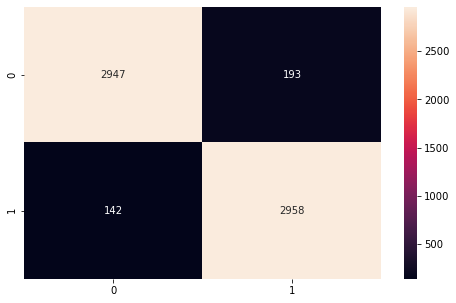

In [24]:
conf_matrix(lr_model)

In [25]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3140
           1       0.94      0.95      0.95      3100

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



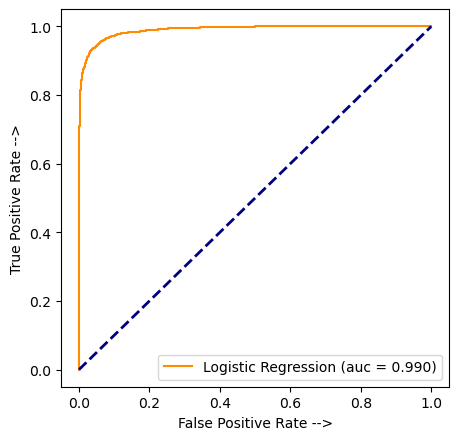

In [26]:
roc(lr_model, "Logistic Regression")

<a id='6.2'></a>
## Random Forest

In [42]:
rf_model = RandomForestClassifier()
train(rf_model, "Random Forest")

Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 91.6923076923077%


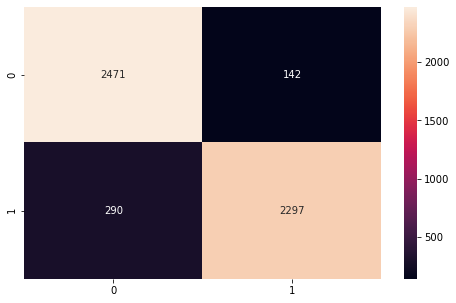

In [43]:
conf_matrix(rf_model)

In [45]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2613
           1       0.94      0.89      0.91      2587

    accuracy                           0.92      5200
   macro avg       0.92      0.92      0.92      5200
weighted avg       0.92      0.92      0.92      5200



<a id='6.3'></a>
## KNN

In [46]:
knn = KNeighborsClassifier()
train(knn, "KNN")

KNN model score on Training data: 83.28846153846153%
KNN model score on Testing data: 75.76923076923077%


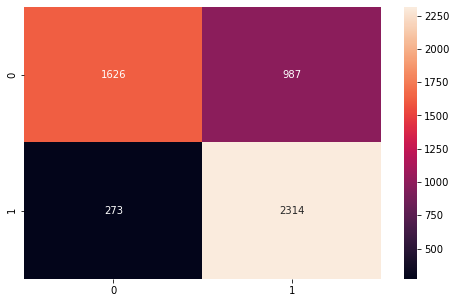

In [47]:
conf_matrix(knn)

In [48]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      2613
           1       0.70      0.89      0.79      2587

    accuracy                           0.76      5200
   macro avg       0.78      0.76      0.75      5200
weighted avg       0.78      0.76      0.75      5200



<a id='6.4'></a>
## Bagging

In [49]:
bagg_model = BaggingClassifier()
train(bagg_model, "Bagging")

Bagging model score on Training data: 99.75%
Bagging model score on Testing data: 96.46153846153847%


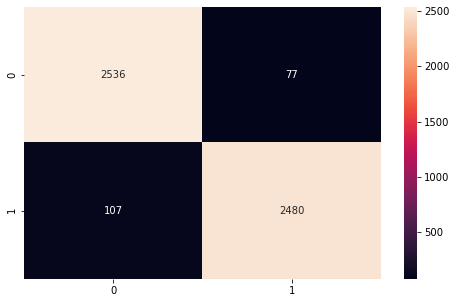

In [50]:
conf_matrix(bagg_model)

In [51]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2613
           1       0.97      0.96      0.96      2587

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



<a id='6.5'></a>
## Gradient Boosting

In [52]:
gb_model = GradientBoostingClassifier()
train(gb_model, "Boosting")

Boosting model score on Training data: 96.77564102564102%
Boosting model score on Testing data: 96.11538461538461%


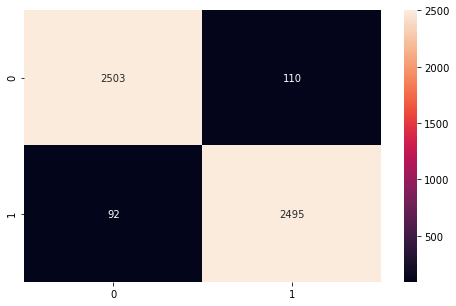

In [53]:
conf_matrix(gb_model)

In [54]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2613
           1       0.96      0.96      0.96      2587

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



<a id='6.6'></a>
## Decision Tree

In [55]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 95.73076923076923%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 95.59615384615384%


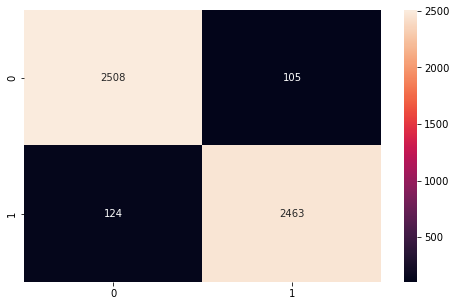

In [56]:
conf_matrix(dt_model)

In [57]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2613
           1       0.96      0.95      0.96      2587

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



<a id='6.7'></a>
## SVM

In [63]:
svm_model = SVC()
train(svm_model, "SVM")

SVM model score on Training data: 99.97435897435898%
SVM model score on Testing data: 96.73076923076923%


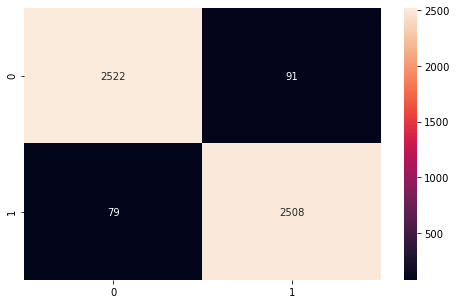

In [64]:
conf_matrix(svm_model)

In [65]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2613
           1       0.96      0.97      0.97      2587

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



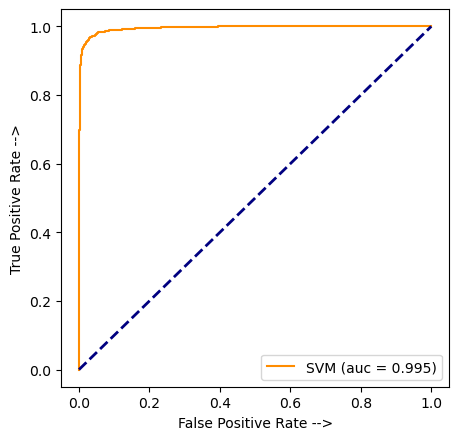

In [68]:
roc(svm_model, "SVM")

<a id='6.8'></a>
## Naive Bayes

In [57]:
naive_bayes = MultinomialNB()
kfolds(naive_bayes, "Naive Bayes")
train(naive_bayes, "Naive Bayes")

Naive Bayes score on cross validation: 80.35096153846155%
Naive Bayes model score on Training data: 89.07051282051283%
Naive Bayes model score on Testing data: 80.76923076923077%


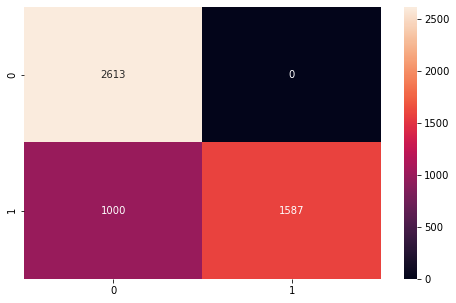

In [58]:
conf_matrix(naive_bayes)

In [59]:
class_report(naive_bayes)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2613
           1       1.00      0.61      0.76      2587

    accuracy                           0.81      5200
   macro avg       0.86      0.81      0.80      5200
weighted avg       0.86      0.81      0.80      5200



<a id='7'></a>
# TP, TN, FP, FN

In [62]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='7.1'></a>
## Logistic Regression

In [69]:
tp(lr_model, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 95.0%
Sensitivity Accuarcy of Logistic Regression: 95.74797062234248%
Specificity Negative Rate Accuarcy of Logistic Regression: 94.25947187141217%
Negative predictive value Accuarcy of Logistic Regression: 95.72483482316362%
Fall out Accuarcy of Logistic Regression: 5.7405281285878305%
False negative rate Accuarcy of Logistic Regression: 4.252029377657519%
False discovery rate Accuarcy of Logistic Regression: 5.709935287400076%


<a id='7.2'></a>
## Random Forest

In [70]:
tp(rf_model, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 91.6923076923077%
Sensitivity Accuarcy of Random Forest: 88.79010436799382%
Specificity Negative Rate Accuarcy of Random Forest: 94.56563337160352%
Negative predictive value Accuarcy of Random Forest: 89.49655921767476%
Fall out Accuarcy of Random Forest: 5.434366628396479%
False negative rate Accuarcy of Random Forest: 11.209895632006186%
False discovery rate Accuarcy of Random Forest: 5.822058220582206%


<a id='7.3'></a>
## KNN

In [71]:
tp(knn, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 75.76923076923077%
Sensitivity Accuarcy of KNN: 89.44723618090453%
Specificity Negative Rate Accuarcy of KNN: 62.227324913892076%
Negative predictive value Accuarcy of KNN: 85.62401263823065%
Fall out Accuarcy of KNN: 37.772675086107924%
False negative rate Accuarcy of KNN: 10.552763819095476%
False discovery rate Accuarcy of KNN: 29.90003029385035%


<a id='7.4'></a>
## Bagging

In [72]:
tp(bagg_model, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 96.46153846153847%
Sensitivity Accuarcy of Bagging: 95.86393505991497%
Specificity Negative Rate Accuarcy of Bagging: 97.05319556065824%
Negative predictive value Accuarcy of Bagging: 95.95157018539538%
Fall out Accuarcy of Bagging: 2.9468044393417525%
False negative rate Accuarcy of Bagging: 4.136064940085041%
False discovery rate Accuarcy of Bagging: 3.0113414157215486%


<a id='7.5'></a>
## Gradient Boosting

In [73]:
tp(gb_model, "Boosting")

TP, FN, TP, FP Overall Accuarcy of Boosting: 96.11538461538461%
Sensitivity Accuarcy of Boosting: 96.44375724777736%
Specificity Negative Rate Accuarcy of Boosting: 95.79027937236893%
Negative predictive value Accuarcy of Boosting: 96.45472061657033%
Fall out Accuarcy of Boosting: 4.209720627631076%
False negative rate Accuarcy of Boosting: 3.556242752222652%
False discovery rate Accuarcy of Boosting: 4.222648752399232%


<a id='7.6'></a>
## Decision Tree

In [74]:
tp(dt_model, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 95.59615384615384%
Sensitivity Accuarcy of Decision Tree: 95.20680324700426%
Specificity Negative Rate Accuarcy of Decision Tree: 95.98163030998852%
Negative predictive value Accuarcy of Decision Tree: 95.2887537993921%
Fall out Accuarcy of Decision Tree: 4.018369690011482%
False negative rate Accuarcy of Decision Tree: 4.7931967529957475%
False discovery rate Accuarcy of Decision Tree: 4.0887850467289715%


<a id='7.7'></a>
## SVM Model

In [75]:
tp(svm_model, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 96.73076923076923%
Sensitivity Accuarcy of SVM: 96.94626981059142%
Specificity Negative Rate Accuarcy of SVM: 96.51741293532339%
Negative predictive value Accuarcy of SVM: 96.96270665128796%
Fall out Accuarcy of SVM: 3.482587064676617%
False negative rate Accuarcy of SVM: 3.0537301894085815%
False discovery rate Accuarcy of SVM: 3.5013466717968447%


<a id='7.8'></a>
## Naive Bayes

In [63]:
tp(naive_bayes, "Naive Bayes")

TP, FN, TP, FP Overall Accuarcy of Naive Bayes: 80.76923076923077%
Sensitivity Accuarcy of Naive Bayes: 61.345187475840746%
Specificity Negative Rate Accuarcy of Naive Bayes: 100.0%
Negative predictive value Accuarcy of Naive Bayes: 72.32216994187655%
Fall out Accuarcy of Naive Bayes: 0.0%
False negative rate Accuarcy of Naive Bayes: 38.65481252415926%
False discovery rate Accuarcy of Naive Bayes: 0.0%
